Importing the necessary libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Loading the 'house_pricing_dataset.csv' file

In [2]:
df = pd.read_csv('house_pricing_dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Q1: The distribution of house prices

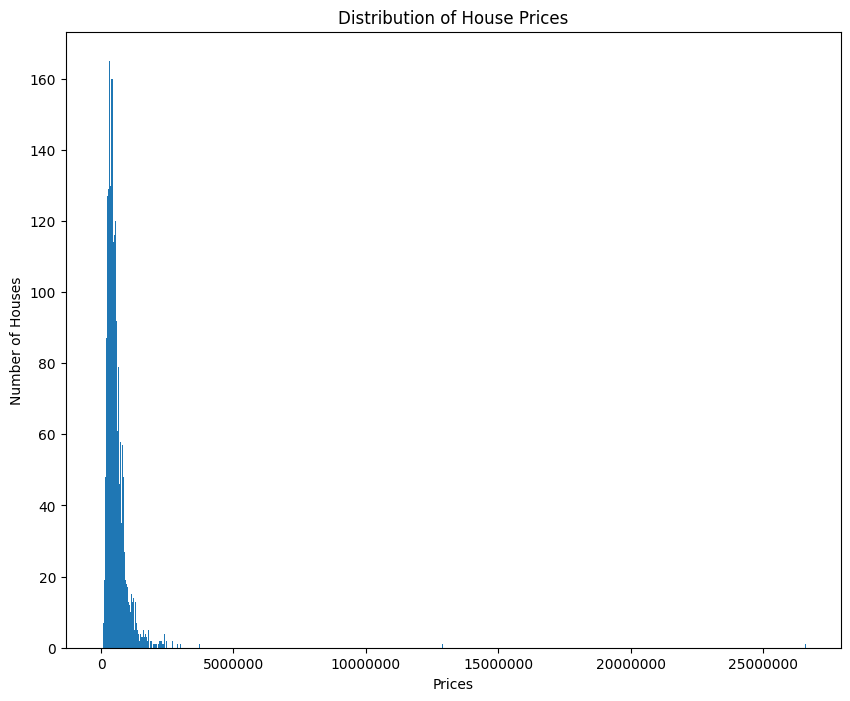

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(df['price'], bins=1500)
plt.title('Distribution of House Prices')
plt.xlabel('Prices')
plt.ylabel('Number of Houses')
plt.ticklabel_format(useOffset=False, style='plain') #removing the scientific notation (1e7)
plt.show()

In fig1 above, I used a histogram to show the distribution of the house prices with 1500 bins. I noticed that almost all the houses fall between 0 price to around 4million. But then there are still some houses that fall around 13million and abit close to 30million.

Q2: The distribution of average house prices across the top 10 cities

In [4]:
# Checking for the top 10 cities
df.city.value_counts().head(10)

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

In [5]:
# arranging the top 10 cities
top_10_cities = df[df['city'].isin(['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way'])]
top_10_cities.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [10]:
# Getting the average house price
average_house_prices = top_10_cities.groupby('city').price.mean().reset_index()
average_house_prices.head()

,city,price
0,Auburn,299340.442766
1,Bellevue,847180.662995
2,Federal Way,289887.703990
3,Issaquah,596163.747475
4,Kent,439492.444648


Text(0, 0.5, 'Price')

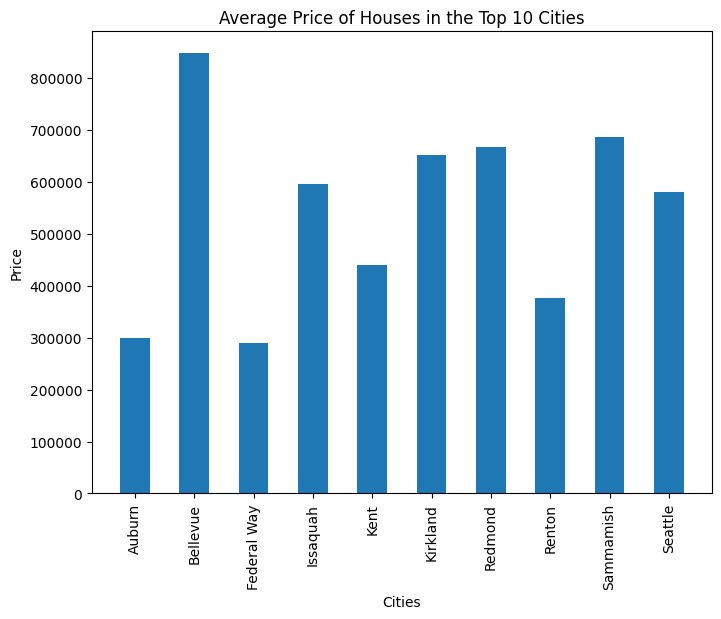

In [17]:
#ploting the bar chart
plt.figure(figsize=(8, 6))
x = np.arange(len(average_house_prices['city']))
y = average_house_prices['price']
plt.bar(x,y, width=0.5)
plt.title('Average Price of Houses in the Top 10 Cities')
plt.xticks(x, average_house_prices['city'], rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Price')

Fig2 above shows the distribution of average house prices across the top 10 cities. The 10 cities where gotten by checking the value count of the city and picking the first 10. I then created a varaible 'top 10 cities' from the city column using the 'isin' method. I also got the averrage house price using the mean of the price column. I noticed that Bellevue has the highest house price among the 10 cities worth about $900,000. While Auburn and Federal Way has the lowest among the 10 cities worth about $300,000 each.

Q3: The trend of house prices from the earliest date to the latest date in the dataset

In [ ]:
df.date.head()

0    2014-05-02 00:00:00
1    2014-05-02 00:00:00
2    2014-05-02 00:00:00
3    2014-05-02 00:00:00
4    2014-05-02 00:00:00
Name: date, dtype: object

In [28]:
# first covert pandas series to a datetime using 
df["date"] = pd.to_datetime(df["date"])
df.date.head()

summing_price = df.groupby(by='date', as_index=False)['price'].sum()  

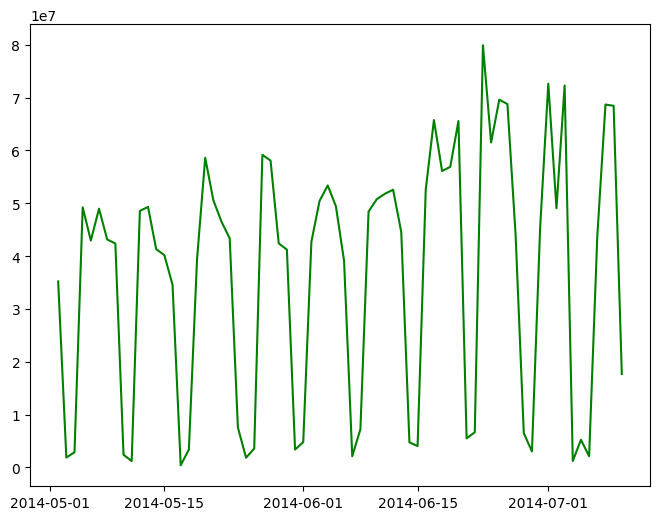

In [30]:
plt.figure(figsize=(8, 6))
summing_price['price'] = summing_price['price'].astype('float')
df.groupby('date')['price'].mean()
plt.plot(summing_price['date'], summing_price['price'], color='green')

Fig3 shows the trend of house prices from the earliest date to the latest date in the dataset. I converrted the date column to pandas datetime to be able to plot it. I noticed a zigzag trend in the plot. I can say that the house prices are always fluctuating from the earliest date to the latest date.

Q4: The distribution of maximum bedroom size across the top 10 cities

In [22]:
max_bedroom = top_10_cities.groupby('city').bedrooms.max().reset_index()
max_bedroom


,city,bedrooms
0,Auburn,7.0
1,Bellevue,7.0
2,Federal Way,6.0
3,Issaquah,7.0
4,Kent,6.0
5,Kirkland,5.0
6,Redmond,7.0
7,Renton,7.0
8,Sammamish,6.0
9,Seattle,9.0


<BarContainer object of 10 artists>

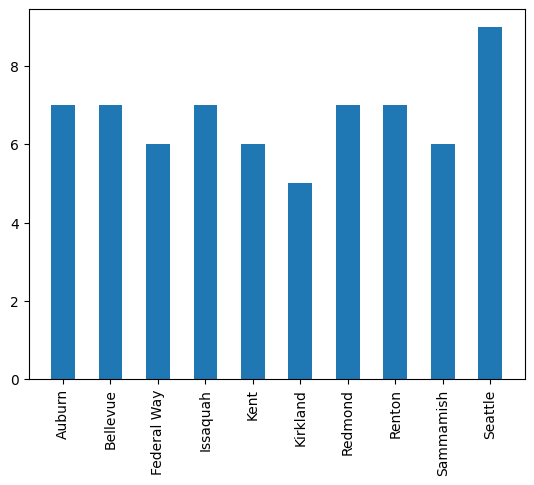

In [26]:
x = np.arange(len(max_bedroom['city']))
y = max_bedroom['bedrooms']
plt.xticks(x, average_house_prices['city'], rotation='vertical')
plt.bar(x,y, width=0.5)


Fig4 shows the distribution of maximum bedroom size across the top 10 cities. I got the maximum bedroom by using the max function. Then I noticed that Seattle has the max number of bedrooms while Kirkland has the least.

Q5: The distribution of oldest houses across top 10 cities

In [51]:
oldest_house = top_10_cities.groupby('city').yr_built.min().reset_index()
oldest_house

,city,yr_built
0,Auburn,1908
1,Bellevue,1911
2,Federal Way,1939
3,Issaquah,1910
4,Kent,1912
5,Kirkland,1900
6,Redmond,1933
7,Renton,1903
8,Sammamish,1923
9,Seattle,1900


<BarContainer object of 10 artists>

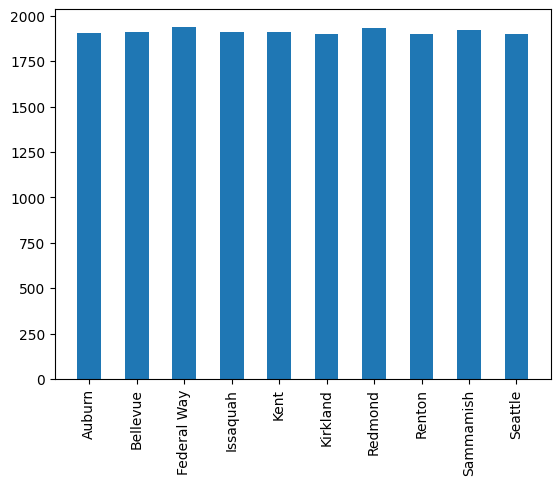

In [52]:
x = np.arange(len(oldest_house['city']))
y = oldest_house['yr_built']
plt.xticks(x, average_house_prices['city'], rotation='vertical')
plt.bar(x,y, width=0.5)

Fig5 shows the distribution of oldest houses across top 10 cities. I can say that all the 10 cities has almost same number of old houses.

Q6: The distribution of the years the houses were last renovated

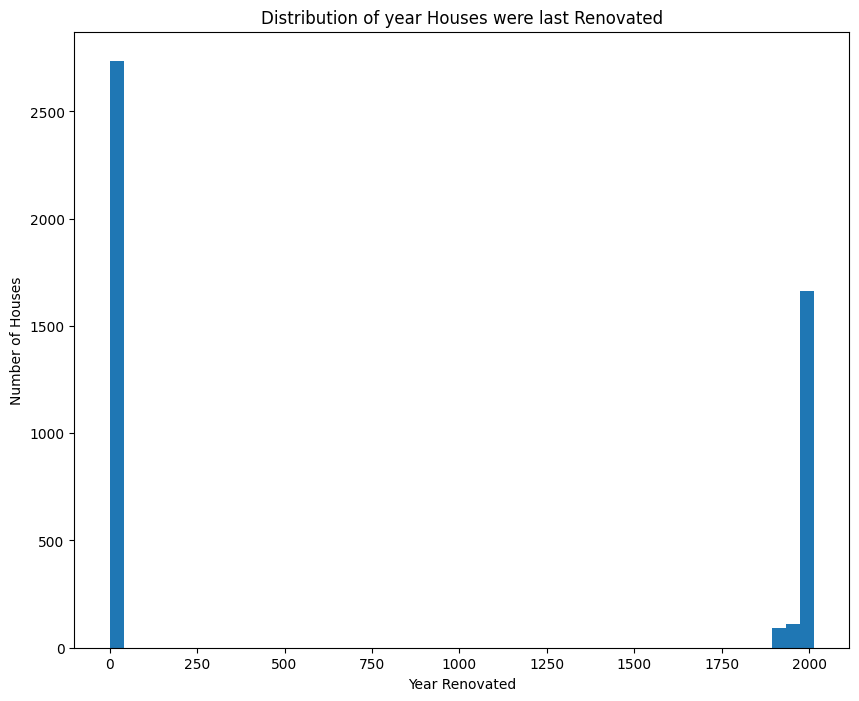

In [63]:
plt.figure(figsize=(10, 8))
plt.hist(df['yr_renovated'], bins=50)
plt.title('Distribution of year Houses were last Renovated')
plt.xlabel('Year Renovated')
plt.ylabel('Number of Houses')
plt.ticklabel_format(useOffset=False, style='plain') #removing the scientific notation (1e7)
plt.show()

Fig6 shows the distribution of the years the houses were last renovated. I can say that so many (not all) houses were renovated between 1990 to 2002.

Q7: The distribution of average basement square feets across top 10 cities

In [64]:
average_basement = top_10_cities.groupby('city').sqft_basement.mean().reset_index()
average_basement

,city,sqft_basement
0,Auburn,157.329545
1,Bellevue,511.923077
2,Federal Way,279.006757
3,Issaquah,336.149733
4,Kent,211.135135
5,Kirkland,304.331551
6,Redmond,203.106383
7,Renton,224.061433
8,Sammamish,166.057143
9,Seattle,390.893833


<BarContainer object of 10 artists>

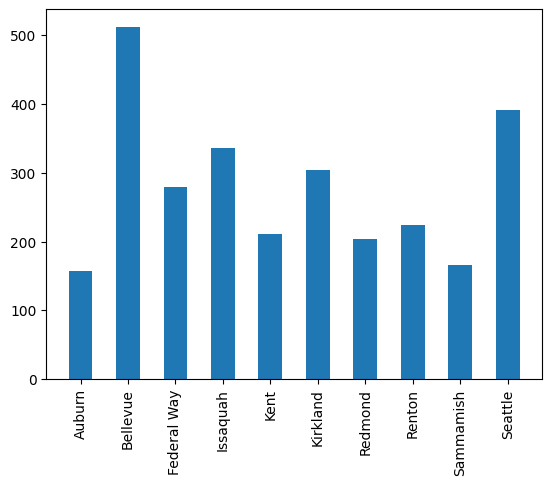

In [65]:
x = np.arange(len(average_basement['city']))
y = average_basement['sqft_basement']
plt.xticks(x, average_house_prices['city'], rotation='vertical')
plt.bar(x,y, width=0.5)

Q8: The relationship between prices and number of bedrooms

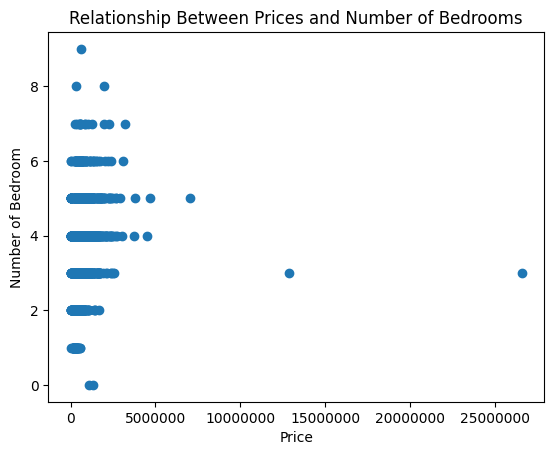

In [71]:
x = df['price']
y = df['bedrooms']
plt.scatter(x,y)
plt.xlabel('Price')
plt.ylabel('Number of Bedroom')
plt.title('Relationship Between Prices and Number of Bedrooms')
plt.plot(ls="--", c=".3")
plt.ticklabel_format(useOffset=False, style='plain') #removing the scientific notation (1e7)

Q9: The relationship between number of bedrooms and year the house was built

<AxesSubplot:xlabel='bedrooms', ylabel='yr_built'>

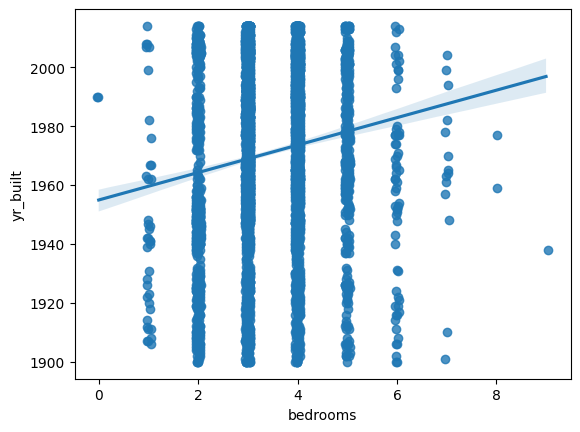

In [95]:
sns.regplot(x="bedrooms", y="yr_built", data=df, x_jitter=.05, y_jitter=.05)

Here, I used regplot to show the relationship between number of bedrooms and year the house was built. Bu then I added “jitter” on both axes make the relationship look more clearer.